In [40]:
from collections import Counter
from functools import cache, lru_cache
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import utils

## Day 6: LanternFish

[#](https://adventofcode.com/2021/day/6) We have a school of lanternfish, each one represented by a number which tells us in how many days that fish reproduces. 

* Each fish reproduces in 7 days - so they reset to zero
* newborn fishes need two days to enter the reproduction cycle
* when a fish hits 0, on the next day it resets to 8 and you add a new fish set to 8 days

In [2]:
test: str = """3,4,3,1,2
"""

raw_inp = utils.get_input(6, splitlines=False)

Decided to use numpy as it makes dealing with arrays both easier and a lot faster.

In [6]:
def parse(inp=test, verbose=False):
    return np.array([int(i) for i in inp.split(",")])


data = parse(test)
data

array([3, 4, 3, 1, 2])

Simple array solution to solve part 1... though I can see how it will fail on larger inputs. Still this is nice and simple to understand so worth doing.

In [99]:
def solve(inp=test, days: int = 80, verbose: bool = False):
    fishes = parse(inp)

    for _ in range(days):
        fishes -= 1  # a new day has come

        # reset mothers to 6
        mothers = fishes == -1
        fishes[mothers] = 6

        # add the newnborns
        fishes = np.append(fishes, np.full(mothers.sum(), 8))

    return fishes.size


assert solve(test) == 5934  # example answer
solve(raw_inp)

365862

## Part 2

Same as above, just taking it to 256 days. So the simple loop solution as above fails to work. So instead of modelling each fish as I did earlier, a simple way of thinking about this is to just model the number of fish in each days. 

We know that the age of a fish can only by from 0-8 days inclusive, so I'll just store the number of fish in each day. That should be a lot less memory and cpu intensive problem.

Using counter to store each day as a key:

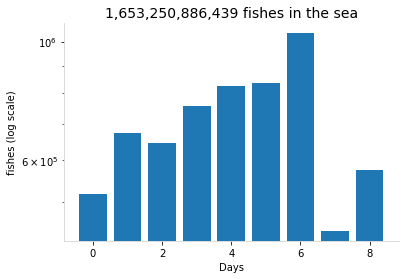

1653250886439

In [98]:
def plot_fish(ocean):
    """makes a simple bar plot of fish in the ocean"""
    fig, ax = plt.subplots()

    ax.set_xlabel("Days")
    ax.set_yscale("log")
    ax.set_ylabel("fishes (log scale)")

    ax.bar(days.keys(), days.values())
    ax.set_title(f"{ocean.total():,} fishes in the sea")

    plt.show()


def solve_2(inp=test, days: int = 80, show=False):
    seed_fish = parse(inp)

    ocean = Counter({day: 0 for day in range(9)})
    ocean.update(Counter(seed_fish))

    for _ in range(days):
        new_ocean = Counter({day: 0 for day in range(9)})
        for day, fish in ocean.items():
            if day == 0:
                new_ocean[6] += fish
                new_ocean[8] += fish
            else:
                new_ocean[day - 1] += fish

        ocean = new_ocean

    if show:
        plot_fish(ocean)
    return ocean.total()


assert solve_2() == 5934
assert solve_2(raw_inp) == 365862
assert solve_2(days=256) == 26984457539
solve_2(raw_inp, days=256, show=True)

Wow that was a much faster solution! Fast enough to not bother timing. Goes to show that thinking about storage is important - i.e one mega huge array listing every fish become just a dict of 8 days. A very impressive speedup.